In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from meanfield import Input, Dense, Model, Network
from sklearn.preprocessing import StandardScaler

In [2]:
tf.__version__

'1.0.0'

In [3]:
Network.sample_size = 10
Network.target_std_deviation = 0.1 #this feature doesn't affect anything in case of classification
Dense.initial_sigma = -4 #the initial std deviation of weights will be e^-5. 
                        #Higher initial deviation leads to unability to train big networks?

In [4]:
n = 80
data = np.random.normal(size=(n,2))
data = np.concatenate([np.random.normal(size=(n,2)) + 3, data], axis=0)
data = np.concatenate([np.random.normal(size=(n,2)) +np.array([0,4]), data], axis=0)
X = data
y = np.array([[1,0,0]]*n + [[0,1,0]]*n + [[0,0,1]]*n, dtype='int').reshape((-1,3))

In [5]:
stdx = StandardScaler()
X = stdx.fit(X).transform(X)

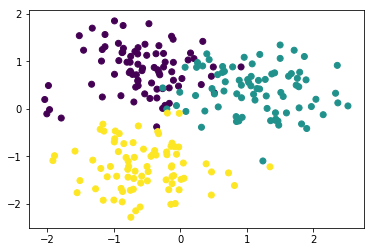

In [6]:
cmap = [1]*n + [2]*n + [3]*n
plt.scatter(x=X[:,0],y=X[:,1], c=cmap)
plt.show()

In [7]:
X.shape, y.shape

((240, 2), (240, 3))

In [8]:
inp = Input(2)

d1 = Dense(20, inp, prior=50, act=tf.nn.relu)
d2 = Dense(20, d1, prior=60, act=tf.nn.relu)
d3 = Dense(20, d2, prior=60, act=tf.nn.relu)

out = Dense(3, d3, act=tf.nn.softmax, prior=100)

Tensor("Relu:0", shape=(?, ?, 20), dtype=float32)
Tensor("Relu_1:0", shape=(?, ?, 20), dtype=float32)
Tensor("Relu_2:0", shape=(?, ?, 20), dtype=float32)
Tensor("Reshape_1:0", shape=(?, ?, 3), dtype=float32)


In [9]:
model = Model(input=inp, output=out, optimizer=tf.train.AdamOptimizer(0.001), loss='crossentropy')

The training error falls then rises: it is caused by increasing dispersion of the weights and doesn't mean that the networks corrupts during training

In [ ]:
for _ in range(60):
    model.fit(X=X, y=y, batchsize=80, nepoch=80, log_freq=40, shuffle_freq=1)
    print(model.sess.run(d1.sigma))

epoch: 0 
 train error: 0.666666666667 
 objective: 2968.15429688



epoch: 40 
 train error: 0.666666666667 
 objective: 2852.61499023



[[ 0.02286929  0.02325475  0.02334907  0.02303788  0.02356696  0.02324471
   0.02334933  0.02329054  0.02363571  0.02338296  0.02337664  0.02310584
   0.02319747  0.02336414  0.02306569  0.02323819  0.02307719  0.02354491
   0.02358543  0.0232606 ]
 [ 0.0233096   0.0232126   0.02327635  0.02331942  0.02298864  0.02336832
   0.02345873  0.0233913   0.02316847  0.02310513  0.02323638  0.02340574
   0.02325785  0.02326038  0.02308008  0.02328366  0.02309366  0.02339586
   0.02332199  0.02302652]]
epoch: 0 
 train error: 0.666666666667 
 objective: 2737.03808594



epoch: 40 
 train error: 0.666666666667 
 objective: 2621.49462891



[[ 0.02907248  0.02956249  0.0296824   0.0292868   0.02995938  0.02954974
   0.02968273  0.029608    0.03004678  0.02972547  0.02971745  0.0293732
   0.02948968  0.02970155  0.02932216  0.02954143  0.02933678  0.02993136
  

In [31]:
samplesize = 1000

In [32]:
base = np.linspace(start=-8, stop=10, num=40, dtype='float32')
X_test = np.array([[x,y] for x in base for y in base])
y_pred = model.predict(X_test, prediction_sample_size=samplesize, return_distrib=False, batchsize=81)[:,1]

100% |########################################################################|


In [33]:
y_pred = y_pred.reshape((40,40))

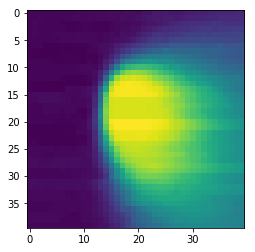

In [34]:
plt.imshow(y_pred)
plt.show()